### PART B

### It is the same as part A except for the normalization of the predictors!

B. Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

In [1]:
import pandas as pd
import numpy as np

Download data

In [3]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Predictors are (according to the assignment instructions):

In [4]:
predictors=concrete_data.drop(['Age','Strength'],axis=1)
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5


Let's normalize the predictors!

In [5]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569


Target variable is:

In [6]:
target = concrete_data['Strength']

Import keras and its utils for model development

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Network building

In [8]:
n_cols=predictors.shape[1]
print('number of predictor is:',n_cols)

number of predictor is: 7


In [9]:
# define regression model
def regression_model_1():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Model fitting:

In [10]:
#Define train test 
from sklearn.model_selection import train_test_split

train, test = train_test_split(predictors_norm, test_size=0.3,random_state=1)

Check the shape of train and test:

In [11]:
print('train shape {}, test shape{}'.format(train.shape,test.shape))

train shape (721, 7), test shape(309, 7)


Retrieve the target for train and test:

In [12]:
target_train=target[train.index]
target_test=target[test.index]

In [13]:
model_1=regression_model_1()

In [14]:
model_1.fit(train, target_train, epochs=50)

Epoch 1/50
721/721 [==============================] - 2s 2ms/step - loss: 1543.8391
Epoch 2/50
721/721 [==============================] - 0s 607us/step - loss: 1524.0123
Epoch 3/50
721/721 [==============================] - 1s 721us/step - loss: 1504.0533
Epoch 4/50
721/721 [==============================] - 1s 723us/step - loss: 1484.8981
Epoch 5/50
721/721 [==============================] - 0s 668us/step - loss: 1465.3132
Epoch 6/50
721/721 [==============================] - 0s 665us/step - loss: 1445.8366
Epoch 7/50
721/721 [==============================] - 1s 890us/step - loss: 1426.2063
Epoch 8/50
721/721 [==============================] - 1s 830us/step - loss: 1406.2429
Epoch 9/50
721/721 [==============================] - 1s 838us/step - loss: 1386.1685
Epoch 10/50
721/721 [==============================] - 1s 750us/step - loss: 1365.16770s - loss: 134
Epoch 11/50
721/721 [==============================] - 1s 969us/step - loss: 1344.1300
Epoch 12/50
721/721 [===================

Evaluation of the model for test set

In [15]:
pred_test=model_1.predict(test)

MSE evaluation

In [16]:
from sklearn.metrics import mean_squared_error
print('MSE for test set target prediction is ',mean_squared_error(target_test, pred_test))

MSE for test set target prediction is  439.83497250395175


Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors

In [17]:
list_mse=[]
for i in range(50):
    print('------------------------')
    print(i)
    #train test splitting
    train_a, test_a = train_test_split(predictors_norm, test_size=0.3)
    y_train=target[train_a.index]
    y_test=target[test_a.index]
    
    #model declaration and fitting
    model_a=regression_model_1()
    model_a.fit(train_a,y_train,epochs=50)
    #mse computation
    mse_a=mean_squared_error(y_test, model_a.predict(test))
    list_mse.append(mse_a)
    
    
    

------------------------
0
Epoch 1/50
721/721 [==============================] - 1s 2ms/step - loss: 1504.7657
Epoch 2/50
721/721 [==============================] - 0s 555us/step - loss: 1487.39300s - loss: 1477.54
Epoch 3/50
721/721 [==============================] - 1s 832us/step - loss: 1469.7033
Epoch 4/50
721/721 [==============================] - 1s 750us/step - loss: 1451.73140s -
Epoch 5/50
721/721 [==============================] - 0s 636us/step - loss: 1433.1547
Epoch 6/50
721/721 [==============================] - 1s 723us/step - loss: 1414.0690
Epoch 7/50
721/721 [==============================] - 1s 1ms/step - loss: 1393.9135
Epoch 8/50
721/721 [==============================] - 1s 831us/step - loss: 1373.2464
Epoch 9/50
721/721 [==============================] - 1s 863us/step - loss: 1351.9435
Epoch 10/50
721/721 [==============================] - 1s 749us/step - loss: 1329.8238
Epoch 11/50
721/721 [==============================] - 1s 831us/step - loss: 1306.6050
Epoch 1

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159917). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120531). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 1ms/step - loss: 819.3965
Epoch 33/50
721/721 [==============================] - 1s 835us/step - loss: 791.5462
Epoch 34/50
721/721 [==============================] - 1s 742us/step - loss: 763.9490
Epoch 35/50
721/721 [==============================] - 0s 637us/step - loss: 737.3813
Epoch 36/50
721/721 [==============================] - 1s 913us/step - loss: 711.2395
Epoch 37/50
721/721 [==============================] - 1s 913us/step - loss: 686.0659
Epoch 38/50
721/721 [==============================] - 1s 1ms/step - loss: 661.5327A: 0s - los
Epoch 39/50
721/721 [==============================] - 1s 1ms/step - loss: 637.4793
Epoch 40/50
721/721 [==============================] - 1s 1ms/step - loss: 614.4796
Epoch 41/50
721/721 [==============================] - 1s 972us/step - loss: 592.2947
Epoch 42/50
721/721 [==============================] - 1s 1ms/step - loss: 570.7045
Epoch 43/50
721/721 [==============================] - 1s 1ms/ste

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119607). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 2ms/step - loss: 1409.1901
Epoch 9/50
721/721 [==============================] - 1s 1ms/step - loss: 1388.8835
Epoch 10/50
721/721 [==============================] - 1s 2ms/step - loss: 1367.6150
Epoch 11/50
721/721 [==============================] - 1s 2ms/step - loss: 1345.2362
Epoch 12/50
721/721 [==============================] - 2s 2ms/step - loss: 1321.8156
Epoch 13/50
721/721 [==============================] - 2s 3ms/step - loss: 1297.3205
Epoch 14/50
721/721 [==============================] - 1s 2ms/step - loss: 1271.7173
Epoch 15/50
721/721 [==============================] - 1s 2ms/step - loss: 1244.9475
Epoch 16/50
721/721 [==============================] - 1s 2ms/step - loss: 1217.1928
Epoch 17/50
721/721 [==============================] - 1s 1ms/step - loss: 1188.2866
Epoch 18/50
721/721 [==============================] - 3s 4ms/step - loss: 1158.3779
Epoch 19/50
721/721 [==============================] - 2s 3ms/step - loss: 112

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101996). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100180). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 2ms/step - loss: 344.4715
Epoch 47/50
721/721 [==============================] - 2s 2ms/step - loss: 331.6255
Epoch 48/50
721/721 [==============================] - 2s 2ms/step - loss: 320.1161
Epoch 49/50
721/721 [==============================] - 2s 2ms/step - loss: 309.2274
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 299.5460
------------------------
13
Epoch 1/50
721/721 [==============================] - 5s 7ms/step - loss: 1560.0795
Epoch 2/50
721/721 [==============================] - 2s 2ms/step - loss: 1544.4332
Epoch 3/50
721/721 [==============================] - 2s 3ms/step - loss: 1528.8039
Epoch 4/50
721/721 [==============================] - 1s 2ms/step - loss: 1513.1164: 0s - loss: 1516.50
Epoch 5/50
721/721 [==============================] - 1s 2ms/step - loss: 1497.1198
Epoch 6/50
721/721 [==============================] - 2s 3ms/step - loss: 1480.5369
Epoch 7/50
721/721 [====================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125291). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 964.9587
Epoch 23/50
721/721 [==============================] - 1s 2ms/step - loss: 932.6530
Epoch 24/50
721/721 [==============================] - 2s 3ms/step - loss: 900.4013A: 0s - loss: 904.75
Epoch 25/50
721/721 [==============================] - 3s 3ms/step - loss: 868.2379A: 0s - loss: 872.6
Epoch 26/50
721/721 [==============================] - 2s 3ms/step - loss: 836.3595
Epoch 27/50
721/721 [==============================] - 3s 4ms/step - loss: 804.8147
Epoch 28/50
721/721 [==============================] - 2s 3ms/step - loss: 773.8911
Epoch 29/50
721/721 [==============================] - 2s 3ms/step - loss: 743.1692
Epoch 30/50
721/721 [==============================] - 2s 2ms/step - loss: 713.3181
Epoch 31/50
721/721 [==============================] - 2s 3ms/step - loss: 683.8096
Epoch 32/50
721/721 [==============================] - 2s 3ms/step - loss: 654.7807
Epoch 33/50
721/721 [============================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123353). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1226.5800
Epoch 18/50
721/721 [==============================] - 2s 2ms/step - loss: 1198.3922
Epoch 19/50
721/721 [==============================] - 1s 2ms/step - loss: 1169.3477
Epoch 20/50
721/721 [==============================] - 1s 2ms/step - loss: 1139.6787
Epoch 21/50
721/721 [==============================] - 2s 3ms/step - loss: 1109.5648
Epoch 22/50
721/721 [==============================] - 2s 3ms/step - loss: 1079.2199
Epoch 23/50
721/721 [==============================] - 1s 2ms/step - loss: 1048.0812
Epoch 24/50
721/721 [==============================] - 2s 3ms/step - loss: 1017.1986
Epoch 25/50
721/721 [==============================] - ETA: 0s - loss: 979.847 - 2s 3ms/step - loss: 985.7928
Epoch 26/50
721/721 [==============================] - 2s 3ms/step - loss: 954.2704
Epoch 27/50
721/721 [==============================] - 3s 4ms/step - loss: 922.5961
Epoch 28/50
721/721 [==============================] -

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100249). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 860.3165
Epoch 30/50
721/721 [==============================] - 2s 3ms/step - loss: 829.2807
Epoch 31/50
721/721 [==============================] - 2s 2ms/step - loss: 798.2563
Epoch 32/50
721/721 [==============================] - 2s 2ms/step - loss: 767.9047
Epoch 33/50
721/721 [==============================] - 2s 2ms/step - loss: 737.3751
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 707.4496
Epoch 35/50
721/721 [==============================] - 2s 3ms/step - loss: 677.7432
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 648.4245
Epoch 37/50
721/721 [==============================] - 2s 2ms/step - loss: 620.0980
Epoch 38/50
721/721 [==============================] - 3s 4ms/step - loss: 592.1545
Epoch 39/50
721/721 [==============================] - 1s 2ms/step - loss: 565.3592
Epoch 40/50
721/721 [==============================] - 2s 2ms/step - loss: 539.3643
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180393). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1428.0322
Epoch 12/50
721/721 [==============================] - 1s 2ms/step - loss: 1408.2525
Epoch 13/50
721/721 [==============================] - 1s 2ms/step - loss: 1388.3017
Epoch 14/50
721/721 [==============================] - 2s 2ms/step - loss: 1367.7130
Epoch 15/50
 96/721 [==>...........................] - ETA: 2s - loss: 1259.1501

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119952). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1346.1386: 0s - los
Epoch 16/50
721/721 [==============================] - 2s 3ms/step - loss: 1324.2763
Epoch 17/50
721/721 [==============================] - 2s 2ms/step - loss: 1301.9154
Epoch 18/50
721/721 [==============================] - 1s 2ms/step - loss: 1278.7093
Epoch 19/50
721/721 [==============================] - 2s 2ms/step - loss: 1255.0848
Epoch 20/50
721/721 [==============================] - 2s 3ms/step - loss: 1230.7789: 0s - loss: 123
Epoch 21/50
721/721 [==============================] - 2s 2ms/step - loss: 1206.1317
Epoch 22/50
721/721 [==============================] - 2s 3ms/step - loss: 1181.2367
Epoch 23/50
721/721 [==============================] - 2s 2ms/step - loss: 1155.6353: 0s - ETA: 0s - loss: 1156.
Epoch 24/50
721/721 [==============================] - 2s 3ms/step - loss: 1129.6905: 0s - loss: 1 - ETA: 0s - l
Epoch 25/50
721/721 [==============================] - 2s 2ms/step - loss: 1103.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121343). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 557.7405A: 0s - loss: 52
Epoch 48/50
721/721 [==============================] - 2s 3ms/step - loss: 537.6331
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 517.7731
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 498.5577
------------------------
23
Epoch 1/50
721/721 [==============================] - 7s 9ms/step - loss: 1585.9387
Epoch 2/50
721/721 [==============================] - 2s 3ms/step - loss: 1570.9965: 0s - los
Epoch 3/50
721/721 [==============================] - 2s 3ms/step - loss: 1556.2995
Epoch 4/50
721/721 [==============================] - 2s 2ms/step - loss: 1541.8426
Epoch 5/50
721/721 [==============================] - 2s 2ms/step - loss: 1527.5233
Epoch 6/50
721/721 [==============================] - 1s 2ms/step - loss: 1512.8851
Epoch 7/50
721/721 [==============================] - 1s 1ms/step - loss: 1498.1135
Epoch 8/50
721/721 [==============

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.179945). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 1054.3045
Epoch 21/50
721/721 [==============================] - 1s 2ms/step - loss: 1018.8414
Epoch 22/50
721/721 [==============================] - 2s 3ms/step - loss: 983.3911
Epoch 23/50
721/721 [==============================] - 2s 3ms/step - loss: 947.3705
Epoch 24/50
721/721 [==============================] - 2s 2ms/step - loss: 911.2756
Epoch 25/50
721/721 [==============================] - 2s 2ms/step - loss: 875.7295
Epoch 26/50
721/721 [==============================] - 2s 3ms/step - loss: 840.2680
Epoch 27/50
721/721 [==============================] - 2s 2ms/step - loss: 805.1672
Epoch 28/50
721/721 [==============================] - 2s 3ms/step - loss: 771.0074
Epoch 29/50
721/721 [==============================] - 2s 3ms/step - loss: 737.2018A: 2s 
Epoch 30/50
721/721 [==============================] - 3s 4ms/step - loss: 704.4799
Epoch 31/50
721/721 [==============================] - 3s 3ms/step - loss: 672.0

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100071). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 2ms/step - loss: 1474.6580
Epoch 7/50
721/721 [==============================] - 2s 3ms/step - loss: 1460.3997
Epoch 8/50
 64/721 [=>............................] - ETA: 3s - loss: 1412.7257

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121097). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 1ms/step - loss: 1445.6936
Epoch 9/50
721/721 [==============================] - 4s 6ms/step - loss: 1430.6062
Epoch 10/50
721/721 [==============================] - 2s 3ms/step - loss: 1415.0154
Epoch 11/50
721/721 [==============================] - 2s 3ms/step - loss: 1398.5902
Epoch 12/50
721/721 [==============================] - 2s 3ms/step - loss: 1381.9734
Epoch 13/50
721/721 [==============================] - 2s 2ms/step - loss: 1364.1214
Epoch 14/50
721/721 [==============================] - 1s 2ms/step - loss: 1346.3510
Epoch 15/50
721/721 [==============================] - 1s 2ms/step - loss: 1327.1372
Epoch 16/50
721/721 [==============================] - 1s 2ms/step - loss: 1307.9515
Epoch 17/50
721/721 [==============================] - 2s 3ms/step - loss: 1287.3443
Epoch 18/50
721/721 [==============================] - 2s 3ms/step - loss: 1266.4610
Epoch 19/50
721/721 [==============================] - 2s 2ms/step - loss: 124

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100303). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 1221.6804
Epoch 21/50
721/721 [==============================] - 2s 2ms/step - loss: 1197.8635
Epoch 22/50
721/721 [==============================] - 2s 3ms/step - loss: 1173.5608
Epoch 23/50
721/721 [==============================] - 2s 2ms/step - loss: 1148.1560
Epoch 24/50
721/721 [==============================] - 2s 3ms/step - loss: 1121.7028
Epoch 25/50
721/721 [==============================] - 2s 2ms/step - loss: 1094.7667
Epoch 26/50
721/721 [==============================] - 2s 2ms/step - loss: 1066.9295
Epoch 27/50
721/721 [==============================] - 2s 2ms/step - loss: 1037.6382
Epoch 28/50
721/721 [==============================] - 2s 3ms/step - loss: 1007.8716
Epoch 29/50
721/721 [==============================] - 2s 3ms/step - loss: 976.4242
Epoch 30/50
721/721 [==============================] - 2s 3ms/step - loss: 944.5358
Epoch 31/50
721/721 [==============================] - 2s 3ms/step - loss: 912.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119968). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 600.3027
Epoch 37/50
721/721 [==============================] - 2s 3ms/step - loss: 573.8055
Epoch 38/50
721/721 [==============================] - 2s 3ms/step - loss: 548.8737
Epoch 39/50
721/721 [==============================] - 1s 2ms/step - loss: 524.9302
Epoch 40/50
721/721 [==============================] - 1s 2ms/step - loss: 502.2492A: 1s - l
Epoch 41/50
721/721 [==============================] - 2s 2ms/step - loss: 480.5332
Epoch 42/50
721/721 [==============================] - 2s 2ms/step - loss: 459.9493
Epoch 43/50
721/721 [==============================] - 2s 3ms/step - loss: 440.8243A: 0s - loss: 43
Epoch 44/50
721/721 [==============================] - 1s 2ms/step - loss: 423.1841
Epoch 45/50
721/721 [==============================] - 1s 1ms/step - loss: 405.9491
Epoch 46/50
721/721 [==============================] - 2s 2ms/step - loss: 390.4372
Epoch 47/50
721/721 [==============================] - 1s 2ms/s

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100015). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 2ms/step - loss: 1450.4085
Epoch 6/50
721/721 [==============================] - 2s 2ms/step - loss: 1429.4879
Epoch 7/50
721/721 [==============================] - 1s 2ms/step - loss: 1408.2832
Epoch 8/50
721/721 [==============================] - 2s 3ms/step - loss: 1385.7699
Epoch 9/50
721/721 [==============================] - 2s 3ms/step - loss: 1362.0576
Epoch 10/50
721/721 [==============================] - 1s 1ms/step - loss: 1337.3479: 0s -
Epoch 11/50
721/721 [==============================] - 1s 2ms/step - loss: 1311.2891
Epoch 12/50
721/721 [==============================] - 2s 3ms/step - loss: 1284.4889
Epoch 13/50
721/721 [==============================] - 2s 3ms/step - loss: 1256.5027
Epoch 14/50
721/721 [==============================] - 2s 3ms/step - loss: 1227.7169
Epoch 15/50
721/721 [==============================] - 2s 3ms/step - loss: 1197.9985
Epoch 16/50
721/721 [==============================] - 2s 3ms/step - loss: 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140787). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 590.0602
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 565.9830
Epoch 37/50
721/721 [==============================] - 1s 2ms/step - loss: 543.6731
Epoch 38/50
721/721 [==============================] - 2s 2ms/step - loss: 522.0279
Epoch 39/50
721/721 [==============================] - 2s 3ms/step - loss: 501.8609
Epoch 40/50
721/721 [==============================] - 2s 3ms/step - loss: 482.2568
Epoch 41/50
721/721 [==============================] - 2s 2ms/step - loss: 464.5391
Epoch 42/50
721/721 [==============================] - 1s 2ms/step - loss: 447.3816
Epoch 43/50
721/721 [==============================] - 1s 2ms/step - loss: 431.4872
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 416.5655
Epoch 45/50
721/721 [==============================] - 2s 2ms/step - loss: 402.2189
Epoch 46/50
721/721 [==============================] - 1s 2ms/step - loss: 389.5382
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159302). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 1506.1782
Epoch 6/50
721/721 [==============================] - 2s 3ms/step - loss: 1493.1528
Epoch 7/50
721/721 [==============================] - 2s 2ms/step - loss: 1480.2253
Epoch 8/50
721/721 [==============================] - 2s 2ms/step - loss: 1467.4121
Epoch 9/50
721/721 [==============================] - 1s 2ms/step - loss: 1454.1693
Epoch 10/50
721/721 [==============================] - 2s 2ms/step - loss: 1440.5441
Epoch 11/50
721/721 [==============================] - 2s 3ms/step - loss: 1426.4939
Epoch 12/50
721/721 [==============================] - 1s 2ms/step - loss: 1410.9305
Epoch 13/50
721/721 [==============================] - 2s 2ms/step - loss: 1394.8676
Epoch 14/50
721/721 [==============================] - 1s 2ms/step - loss: 1377.5992
Epoch 15/50
721/721 [==============================] - 1s 2ms/step - loss: 1359.6393
Epoch 16/50
721/721 [==============================] - 2s 3ms/step - loss: 1340.7

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119867). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 930.4004
Epoch 31/50
721/721 [==============================] - 1s 2ms/step - loss: 903.6389
Epoch 32/50
721/721 [==============================] - 2s 3ms/step - loss: 876.5374
Epoch 33/50
721/721 [==============================] - 2s 2ms/step - loss: 849.5452
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 822.6137
Epoch 35/50
721/721 [==============================] - 3s 4ms/step - loss: 795.9234
Epoch 36/50
721/721 [==============================] - 3s 3ms/step - loss: 769.2482
Epoch 37/50
721/721 [==============================] - 2s 3ms/step - loss: 742.9929
Epoch 38/50
721/721 [==============================] - 2s 3ms/step - loss: 717.1139
Epoch 39/50
721/721 [==============================] - 1s 2ms/step - loss: 691.8367
Epoch 40/50
721/721 [==============================] - 1s 2ms/step - loss: 666.8532
Epoch 41/50
721/721 [==============================] - 2s 2ms/step - loss: 642.6855
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119234). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1292.1878
Epoch 18/50
721/721 [==============================] - 2s 3ms/step - loss: 1270.2527
Epoch 19/50
721/721 [==============================] - 2s 3ms/step - loss: 1247.7373
Epoch 20/50
721/721 [==============================] - 2s 3ms/step - loss: 1224.5716
Epoch 21/50
721/721 [==============================] - 2s 2ms/step - loss: 1200.9138
Epoch 22/50
721/721 [==============================] - ETA: 0s - loss: 1177.51 - ETA: 0s - loss: 1184.60 - 2s 3ms/step - loss: 1176.5645
Epoch 23/50
721/721 [==============================] - 2s 3ms/step - loss: 1151.9831: 0s - loss: 117
Epoch 24/50
721/721 [==============================] - 2s 3ms/step - loss: 1126.4692
Epoch 25/50
721/721 [==============================] - 3s 4ms/step - loss: 1100.5715
Epoch 26/50
721/721 [==============================] - 2s 2ms/step - loss: 1073.2790
Epoch 27/50
721/721 [==============================] - 2s 3ms/step - loss: 1045.9020
Epoch 28/

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120324). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 562.8407
Epoch 41/50
721/721 [==============================] - 2s 3ms/step - loss: 538.5267A: 1s - 
Epoch 42/50
721/721 [==============================] - 1s 2ms/step - loss: 515.9685
Epoch 43/50
721/721 [==============================] - 2s 3ms/step - loss: 494.3526
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 472.8841
Epoch 45/50
721/721 [==============================] - 1s 2ms/step - loss: 452.8810
Epoch 46/50
721/721 [==============================] - 2s 3ms/step - loss: 433.8943
Epoch 47/50
721/721 [==============================] - 2s 3ms/step - loss: 415.3198
Epoch 48/50
721/721 [==============================] - 2s 2ms/step - loss: 398.1827
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 381.9237
Epoch 50/50
721/721 [==============================] - 2s 3ms/step - loss: 366.4044
------------------------
35
Epoch 1/50
721/721 [==============================] 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119877). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 642.5063
Epoch 35/50
721/721 [==============================] - 2s 2ms/step - loss: 616.3868
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 591.0237
Epoch 37/50
721/721 [==============================] - 2s 3ms/step - loss: 566.9042
Epoch 38/50
721/721 [==============================] - 3s 4ms/step - loss: 543.5130
Epoch 39/50
721/721 [==============================] - 2s 2ms/step - loss: 521.1204
Epoch 40/50
721/721 [==============================] - 2s 2ms/step - loss: 499.8342
Epoch 41/50
721/721 [==============================] - 2s 3ms/step - loss: 479.2585
Epoch 42/50
721/721 [==============================] - 2s 3ms/step - loss: 459.9885
Epoch 43/50
721/721 [==============================] - 1s 2ms/step - loss: 441.9132
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 424.2874
Epoch 45/50
721/721 [==============================] - 2s 2ms/step - loss: 407.8577
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139597). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1509.5342
Epoch 3/50
721/721 [==============================] - 2s 3ms/step - loss: 1492.0516
Epoch 4/50
721/721 [==============================] - 2s 3ms/step - loss: 1474.1408
Epoch 5/50
721/721 [==============================] - 2s 3ms/step - loss: 1455.5128
Epoch 6/50
721/721 [==============================] - 2s 2ms/step - loss: 1436.4341
Epoch 7/50
721/721 [==============================] - 1s 1ms/step - loss: 1416.6814
Epoch 8/50
721/721 [==============================] - 2s 2ms/step - loss: 1395.9510
Epoch 9/50
721/721 [==============================] - 2s 2ms/step - loss: 1374.5214
Epoch 10/50
721/721 [==============================] - 2s 2ms/step - loss: 1352.4049
Epoch 11/50
721/721 [==============================] - 2s 2ms/step - loss: 1329.2617
Epoch 12/50
721/721 [==============================] - 1s 2ms/step - loss: 1305.3137
Epoch 13/50
721/721 [==============================] - 2s 2ms/step - loss: 1280.4166

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119659). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1500.9399
Epoch 8/50
721/721 [==============================] - 2s 2ms/step - loss: 1480.4810
Epoch 9/50
721/721 [==============================] - 2s 2ms/step - loss: 1458.8263
Epoch 10/50
721/721 [==============================] - 1s 2ms/step - loss: 1435.7856
Epoch 11/50
721/721 [==============================] - 2s 2ms/step - loss: 1411.4198
Epoch 12/50
721/721 [==============================] - 1s 2ms/step - loss: 1385.7234
Epoch 13/50
721/721 [==============================] - 2s 2ms/step - loss: 1358.6425
Epoch 14/50
721/721 [==============================] - 2s 3ms/step - loss: 1330.4184
Epoch 15/50
721/721 [==============================] - 2s 3ms/step - loss: 1301.0318
Epoch 16/50
721/721 [==============================] - 2s 3ms/step - loss: 1271.1922
Epoch 17/50
721/721 [==============================] - 2s 3ms/step - loss: 1239.4194
Epoch 18/50
721/721 [==============================] - 2s 2ms/step - loss: 1207

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130250). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1439.3243
Epoch 5/50
721/721 [==============================] - 2s 3ms/step - loss: 1422.4230
Epoch 6/50
721/721 [==============================] - 1s 2ms/step - loss: 1404.6326
Epoch 7/50
721/721 [==============================] - 2s 3ms/step - loss: 1385.7497
Epoch 8/50
721/721 [==============================] - 1s 2ms/step - loss: 1365.9302
Epoch 9/50
721/721 [==============================] - 1s 2ms/step - loss: 1345.1498
Epoch 10/50
721/721 [==============================] - 2s 3ms/step - loss: 1323.3571
Epoch 11/50
721/721 [==============================] - 1s 2ms/step - loss: 1300.5301
Epoch 12/50
721/721 [==============================] - 1s 2ms/step - loss: 1276.9632
Epoch 13/50
721/721 [==============================] - 2s 3ms/step - loss: 1252.2263
Epoch 14/50
721/721 [==============================] - 2s 2ms/step - loss: 1226.7481
Epoch 15/50
721/721 [==============================] - 3s 4ms/step - loss: 1200.35

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219729). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110463). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 427.8200
Epoch 42/50
721/721 [==============================] - 2s 3ms/step - loss: 406.9628
Epoch 43/50
721/721 [==============================] - 3s 4ms/step - loss: 387.2917
Epoch 44/50
721/721 [==============================] - 2s 2ms/step - loss: 368.8398
Epoch 45/50
721/721 [==============================] - 2s 2ms/step - loss: 352.0782
Epoch 46/50
721/721 [==============================] - 2s 2ms/step - loss: 335.8415
Epoch 47/50
721/721 [==============================] - 2s 2ms/step - loss: 321.5081
Epoch 48/50
721/721 [==============================] - 2s 3ms/step - loss: 307.7101A: 0s - loss
Epoch 49/50
721/721 [==============================] - 2s 2ms/step - loss: 295.3296
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 283.7125
------------------------
41
Epoch 1/50
721/721 [==============================] - 11s 15ms/step - loss: 1544.8754
Epoch 2/50
721/721 [==========================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100176). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 1372.1575
Epoch 11/50
721/721 [==============================] - 2s 3ms/step - loss: 1350.1145
Epoch 12/50
721/721 [==============================] - 1s 2ms/step - loss: 1327.3214: 0s - loss: 1335.38
Epoch 13/50
721/721 [==============================] - 2s 3ms/step - loss: 1302.9705
Epoch 14/50
721/721 [==============================] - 2s 2ms/step - loss: 1278.1316
Epoch 15/50
721/721 [==============================] - 2s 2ms/step - loss: 1252.2055
Epoch 16/50
721/721 [==============================] - 1s 2ms/step - loss: 1225.3184: 0s - loss: 1224.
Epoch 17/50
721/721 [==============================] - 2s 3ms/step - loss: 1197.5819
Epoch 18/50
721/721 [==============================] - 2s 3ms/step - loss: 1169.0374: 0s - loss: 118
Epoch 19/50
721/721 [==============================] - 2s 2ms/step - loss: 1139.8018
Epoch 20/50
721/721 [==============================] - 2s 3ms/step - loss: 1110.2416
Epoch 21/50
721/721 [==

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105087). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 953.8544
Epoch 26/50
721/721 [==============================] - 2s 3ms/step - loss: 921.9416
Epoch 27/50
721/721 [==============================] - 2s 3ms/step - loss: 890.0589
Epoch 28/50
721/721 [==============================] - 2s 3ms/step - loss: 857.6738
Epoch 29/50
721/721 [==============================] - 1s 2ms/step - loss: 825.4106
Epoch 30/50
721/721 [==============================] - 1s 2ms/step - loss: 793.3594
Epoch 31/50
721/721 [==============================] - 2s 3ms/step - loss: 761.2073
Epoch 32/50
721/721 [==============================] - 2s 2ms/step - loss: 729.5507A: 1s - 
Epoch 33/50
721/721 [==============================] - 1s 2ms/step - loss: 698.9183A: 0s - lo
Epoch 34/50
721/721 [==============================] - 2s 2ms/step - loss: 668.2774
Epoch 35/50
721/721 [==============================] - 2s 3ms/step - loss: 638.3191
Epoch 36/50
721/721 [==============================] - 3s 4ms/step - l

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118920). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 505.0040
Epoch 42/50
721/721 [==============================] - 2s 3ms/step - loss: 483.8364
Epoch 43/50
721/721 [==============================] - 2s 3ms/step - loss: 463.8471
Epoch 44/50
721/721 [==============================] - 2s 2ms/step - loss: 444.5239
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 426.4591
Epoch 46/50
721/721 [==============================] - 2s 3ms/step - loss: 409.2166
Epoch 47/50
721/721 [==============================] - 1s 1ms/step - loss: 392.7759
Epoch 48/50
721/721 [==============================] - 2s 2ms/step - loss: 377.2699
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 363.0946
Epoch 50/50
721/721 [==============================] - 1s 2ms/step - loss: 349.6802
------------------------
43
Epoch 1/50
721/721 [==============================] - 10s 14ms/step - loss: 1576.5642
Epoch 2/50
721/721 [==============================] - 2s 3

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158536). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1048.6301
Epoch 23/50
721/721 [==============================] - 1s 2ms/step - loss: 1009.5339
Epoch 24/50
721/721 [==============================] - 2s 3ms/step - loss: 969.8029
Epoch 25/50
721/721 [==============================] - 2s 2ms/step - loss: 929.6730
Epoch 26/50
721/721 [==============================] - 2s 2ms/step - loss: 889.5255
Epoch 27/50
721/721 [==============================] - 2s 3ms/step - loss: 849.5812
Epoch 28/50
721/721 [==============================] - 2s 2ms/step - loss: 810.3890
Epoch 29/50
721/721 [==============================] - 2s 2ms/step - loss: 772.2963
Epoch 30/50
128/721 [====>.........................] - ETA: 2s - loss: 752.3395

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140283). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 735.1623A: 0s - loss: 7
Epoch 31/50
721/721 [==============================] - 2s 3ms/step - loss: 699.2010A: 0s - loss: 695
Epoch 32/50
721/721 [==============================] - 2s 2ms/step - loss: 664.7796
Epoch 33/50
721/721 [==============================] - 1s 2ms/step - loss: 631.4143
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 600.3149
Epoch 35/50
721/721 [==============================] - 2s 3ms/step - loss: 569.8903
Epoch 36/50
721/721 [==============================] - 2s 2ms/step - loss: 542.0918A: 0s -
Epoch 37/50
721/721 [==============================] - 2s 3ms/step - loss: 515.5462
Epoch 38/50
721/721 [==============================] - 2s 3ms/step - loss: 490.2486A: 1s - loss:
Epoch 39/50
721/721 [==============================] - 2s 3ms/step - loss: 466.6517A: 0
Epoch 40/50
721/721 [==============================] - 2s 3ms/step - loss: 445.0493
Epoch 41/50
128/721 [====>......

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100849). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 423.5470
Epoch 42/50
721/721 [==============================] - 2s 3ms/step - loss: 404.3065
Epoch 43/50
721/721 [==============================] - 3s 4ms/step - loss: 386.0191
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 369.1604
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 352.7109A: 1s - lo
Epoch 46/50
721/721 [==============================] - 1s 2ms/step - loss: 338.1077
Epoch 47/50
721/721 [==============================] - 2s 2ms/step - loss: 324.1409
Epoch 48/50
721/721 [==============================] - 2s 3ms/step - loss: 311.4173
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 299.3519
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 288.5083
------------------------
45
Epoch 1/50
721/721 [==============================] - 12s 17ms/step - loss: 1530.1104
Epoch 2/50
721/721 [============================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140366). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109997). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 417.0845
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 402.2542
Epoch 46/50
721/721 [==============================] - 2s 3ms/step - loss: 388.5292
Epoch 47/50
721/721 [==============================] - 3s 4ms/step - loss: 375.5046
Epoch 48/50
721/721 [==============================] - 2s 2ms/step - loss: 363.0233
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 351.8500
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 340.8938
------------------------
46
Epoch 1/50
721/721 [==============================] - 10s 14ms/step - loss: 1543.70533s - loss: 1
Epoch 2/50
721/721 [==============================] - 1s 2ms/step - loss: 1529.3354
Epoch 3/50
721/721 [==============================] - 2s 3ms/step - loss: 1515.3333
Epoch 4/50
721/721 [==============================] - 2s 3ms/step - loss: 1501.5451
Epoch 5/50
721/721 [==========================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120352). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 2ms/step - loss: 620.7017
Epoch 38/50
721/721 [==============================] - 1s 1ms/step - loss: 595.2011
Epoch 39/50
721/721 [==============================] - 2s 2ms/step - loss: 570.8007
Epoch 40/50
721/721 [==============================] - 1s 2ms/step - loss: 546.8037
Epoch 41/50
721/721 [==============================] - 2s 2ms/step - loss: 524.1862
Epoch 42/50
721/721 [==============================] - 2s 2ms/step - loss: 501.6034
Epoch 43/50
721/721 [==============================] - 1s 2ms/step - loss: 480.7005
Epoch 44/50
721/721 [==============================] - 2s 2ms/step - loss: 460.0234
Epoch 45/50
721/721 [==============================] - 1s 2ms/step - loss: 440.7797
Epoch 46/50
721/721 [==============================] - 1s 2ms/step - loss: 422.5628
Epoch 47/50
721/721 [==============================] - 2s 2ms/step - loss: 404.8796
Epoch 48/50
721/721 [==============================] - 1s 2ms/step - loss: 388.4707
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109229). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 372.9833
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 358.2096
------------------------
48
Epoch 1/50
721/721 [==============================] - 11s 15ms/step - loss: 1560.6699
Epoch 2/50
721/721 [==============================] - 1s 1ms/step - loss: 1544.3304
Epoch 3/50
721/721 [==============================] - 1s 2ms/step - loss: 1528.6556
Epoch 4/50
721/721 [==============================] - 2s 2ms/step - loss: 1513.4194
Epoch 5/50
721/721 [==============================] - 2s 2ms/step - loss: 1498.1858
Epoch 6/50
721/721 [==============================] - 2s 3ms/step - loss: 1482.9795
Epoch 7/50
721/721 [==============================] - 1s 2ms/step - loss: 1467.5095
Epoch 8/50
721/721 [==============================] - 2s 2ms/step - loss: 1451.6450
Epoch 9/50
721/721 [==============================] - 1s 2ms/step - loss: 1435.1316
Epoch 10/50
721/721 [==============================] - 1s 

In [18]:
#Mean and standard deviation of list of mse

In [19]:
len(list_mse)

50

In [20]:
import statistics

In [21]:
print('Mean of MSEs collected:',statistics.mean(list_mse))
print('Standard Deviation of MSEs collected:',statistics.stdev(list_mse))

Mean of MSEs collected: 538.1601195571951
Standard Deviation of MSEs collected: 80.46291218456501


This values show that the normalization process of feature inputs guarantees a better performance.

The mean of MSE is lower than the one of part A and standard deviation dramatically decreases (with respect to part A), meaning also a minor obscillation through the mean value.

It can be useful to plot the trend of MSE through iterations:

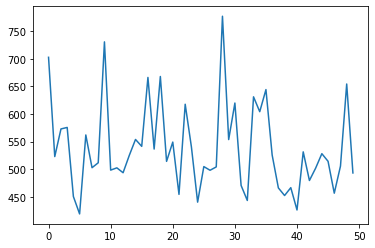

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(50), list_mse)
plt.show()

This plot show that the MSE are better than in the one of part A. Here the maximum value si about 750.

In [25]:
print('max and min of mse are: {} , {}'.format(max(list_mse),min(list_mse)))

max and min of mse are: 776.7406214030522 , 419.2580515389716
